In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

In [10]:
df = pd.read_csv("medical_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


We are analyzing only the following features:

- VitD_levels
- Doc_visits
- TotalCharge

In [35]:
df[['VitD_levels', 'Doc_visits', 'TotalCharge']].head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


In [31]:
# Graphing Function

def kdehist(column):
    
    stats = df[f'{column}'].agg(['mean', 'std', 'median'])
    std_p1 = stats['mean'] + stats['std']
    std_m1 = stats['mean'] - stats['std']
    mean = stats['mean']
    median = stats['median']
    
    fig, axes = plt.subplots(figsize=(10,7))
    
    sns.histplot(data=df, x=column, discrete=True,
                stat='density')
    axes.axvline(stats['mean'], color='red', label=f'Mean: {mean:,.2f}')
    axes.axvline(stats['median'], color='green', 
               label= f'Median: {median:,.2f}', ls='--')
    axes.axvline(std_p1, color='k', label=f'STD + 1: {std_p1:,.2f}')
    axes.axvline(std_m1, color='k', label=f'STD - 1: {std_m1:,.2f}')
    axes.axvspan(std_p1, std_m1, color='yellow', zorder=0)
    
    sns.kdeplot(data=df, x=column)
    
    axes.set_title(f'KDE Histogram for {column}')

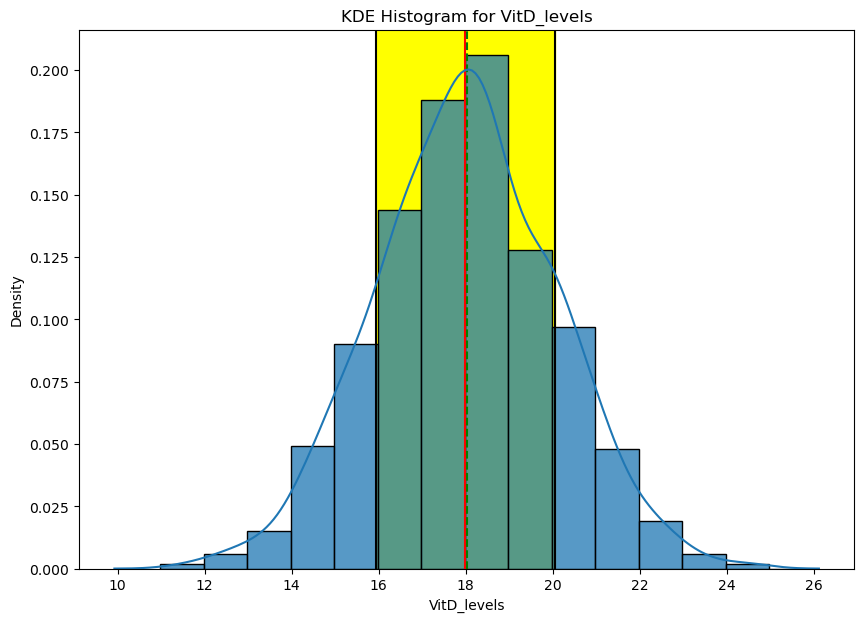

In [32]:
kdehist('VitD_levels')

In [41]:
kurt = stats.kurtosis(df['VitD_levels'], fisher=False)
kurt

3.013147515833447

1) Discrete or Continuous?

This is a discrete value as there is a specific range of values that is expected in this category, it can't just be any number. Too high or too low is cause for medical concern.

2) Is there a skew?

There is now visual skew in the graph

3) What type of kurtosis does it display?

Because the result is ~3, then it is Mesokurtic

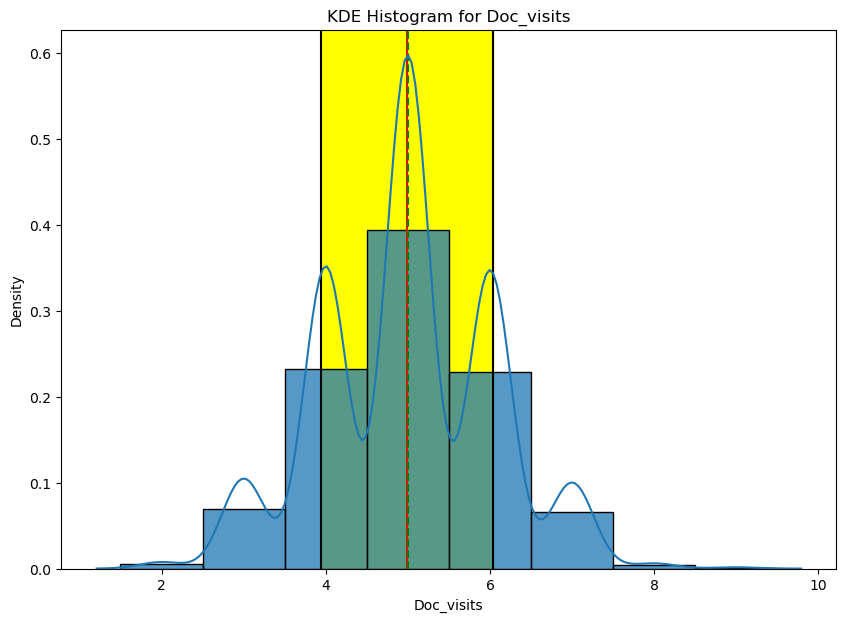

In [46]:
kdehist('Doc_visits')

In [42]:
kurt = stats.kurtosis(df['Doc_visits'], fisher=False)
kurt

2.9919958083381206

1) Discrete or Continuous?

This is a continuous value as there is no exact or expected range, people can visit the doctor as much or as little as they choose to.

2) Is there a skew?

There is now visual skew in the graph

3) What type of kurtosis does it display?

Because the result is less than 3, then it is Platykurtic

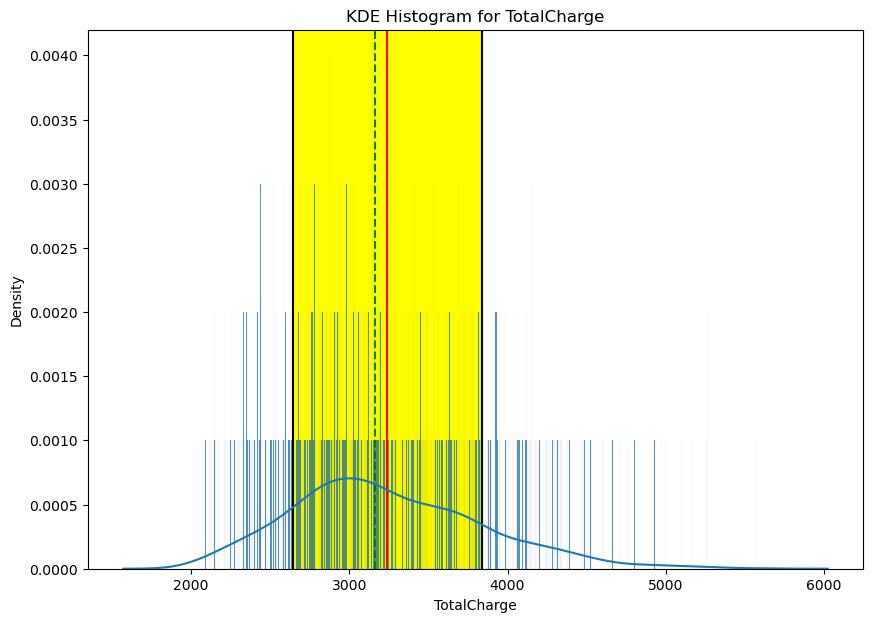

In [47]:
kdehist('TotalCharge')

In [45]:
kurt = stats.kurtosis(df['TotalCharge'], fisher=False)
kurt

3.2650077463439384

1) Discrete or Continuous?

This is a continuous value as the charge can be any number.

2) Is there a skew?

There is a positive skew on the graph.

3) What type of kurtosis does it display?

Because the result is greater than 3, then it is Leptokurtic